In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)

In [40]:
df["data"].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
df['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [42]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [43]:
#in general, 1 is true and zero is false

In [44]:
x=df['data']
y=df['target']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
ss_train=StandardScaler()
xtrain=ss_train.fit_transform(xtrain)
ss_test=StandardScaler()
xtest=ss_test.fit_transform(xtest)

In [46]:
models={}

#logistic regression
from sklearn.linear_model import LogisticRegression
models['logistic regression']= LogisticRegression()

#support vector machines
from sklearn.svm import LinearSVC
models['Support vector machines']= LinearSVC()

# K-Nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
models['KNeighborsClassifier']= KNeighborsClassifier()

# Decision tree
from sklearn.tree import DecisionTreeClassifier
models['decision trees']=DecisionTreeClassifier()

#Naive bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes']= GaussianNB()


In [47]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy,precision,recall={},{},{}

for key in models.keys():    
    #fit the classifier
    models[key].fit(xtrain, ytrain)
    
    #make predictions
    predictions = models[key].predict(xtest)

    print(predictions)
    #calculate matrics
    accuracy[key]=accuracy_score(predictions,ytest)
    precision[key]=precision_score(predictions,ytest)
    recall[key]=recall_score(predictions,ytest)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0]
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1

C:\Users\ram\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
import pandas as pd
df_model=pd.DataFrame(index=models.keys(),columns=["accuracy","precision","recall"])
df_model["accuracy"]=accuracy.values()
df_model["precision"]=precision.values()
df_model["recall"]=recall.values()
df_model

,accuracy,precision,recall
logistic regression,0.958042,0.955556,0.977273
Support vector machines,0.937063,0.933333,0.965517
Naive Bayes,0.937063,0.955556,0.945055
KNeighborsClassifier,0.951049,0.988889,0.936842
decision trees,0.909091,0.866667,0.987342


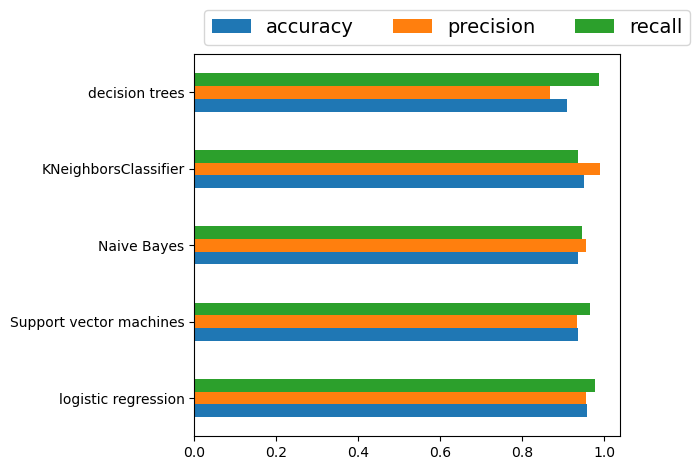

In [38]:
ax=df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0,1),
    loc="lower left",
    prop={"size":14}
)
plt.tight_layout()